# Implementing quantum gates from scratch: Simulating circuits and qubit gates

## Exact representation of spin-1/2 operators on a chain

### The starting point is to implement the Pauli spin chain operators on a spin-$1/2$ chain with $L$ spins.
### The Pauli spin operators $X_i,Y_i,Z_i$ acting on $i$-th spin are defined as:
### \begin{equation}
 \begin{split}
 X_i  &= \mathbb{1}_1\otimes\dots\mathbb{1}_{i-1}\otimes\hat{\sigma}^x\otimes\mathbb{1}_{i+1}\dots\mathbb{1}_{L},\\
 Y_i  &= \mathbb{1}_1\otimes\dots\mathbb{1}_{i-1}\otimes\hat{\sigma}^y\otimes\mathbb{1}_{i+1}\dots\mathbb{1}_{L},\\
 Z_i  &= \mathbb{1}_1\otimes\dots\mathbb{1}_{i-1}\otimes\hat{\sigma}^z\otimes\mathbb{1}_{i+1}\dots\mathbb{1}_{L},
 \end{split}
\end{equation}
### where $\hat{\sigma}^{x,y,z}$ are $2\times2$ Pauli operators.


## spin-1/2 $\equiv$ qubit

### In a similar manner we can define Hadamard matrix $H_i$ acting on $i$-th spin, i.e.
### \begin{equation}
H_i = \mathbb{1}_1\otimes\dots\mathbb{1}_{i-1}\otimes H\otimes\mathbb{1}_{i+1}\dots\mathbb{1}_{L},
\end{equation}
### where $H = \frac{\hat{\sigma}^x + \hat{\sigma}^z}{\sqrt{2}}$.

## PyTorch implementation

In [ ]:
import matplotlib.pyplot as plt
import torch as pt
from torch import matrix_exp as expm
from torch.linalg import eigh as eigh
import numpy as np

In [ ]:
def get_Identity(k):  # returns k-tensor product of the identity operator, ie. Id^k
    Id = id_local
    for i in range(0, k-1):
        Id = pt.kron(Id, id_local)
    return Id
       
def get_chain_operator(A, L, i):
    Op = A
    if(i == 1):
        Op = pt.kron(A,get_Identity(L-1))
        return Op
    if(i == L):
        Op = pt.kron(get_Identity(L-1),A)
        return Op
    if(i>0 and i<L):
        Op = pt.kron(get_Identity(i-1), pt.kron(Op, get_Identity(L-i)))
        return Op

def get_chain_operators(L):
    
    Id = get_chain_operator(id_local, L, 1)
    X = {}
    Y = {}
    Z = {}

    for qubit_i in range(1, L+1):    # Loop over indices on a 2-dimensional grid (i_x,i_y)
        X[qubit_i] = get_chain_operator(sigma_x, L, qubit_i)        # Define operator X_i acting on spin (i_x,i_y)
        Y[qubit_i] = get_chain_operator(sigma_y, L, qubit_i)        # Define operator Y_i acting on spin (i_x,i_y)
        Z[qubit_i] = get_chain_operator(sigma_z, L, qubit_i)        # Define operator Z_i acting on spin (i_x,i_y)
    return Id, X, Y, Z


id_local = pt.tensor([[1.,0],[0,1.]])
sigma_x = pt.tensor([[0,1.],[1.,0]])
sigma_y = 1j*pt.tensor([[0,-1.],[1.,0]])
sigma_z = pt.tensor([[1.,0],[0,-1.]])
hadamard = 1.0/pt.sqrt(pt.tensor(2))*pt.tensor([[1,1],[1,-1]])+1j*0    


## Operators are expressed in the diagonal basis of the $Z = \sum_{i=1}^{L} Z_i$ operator


### \begin{equation}
 \begin{split}
   |v_1\rangle & = |\uparrow \uparrow \dots \uparrow \rangle \\
   |v_2\rangle & = |\uparrow \uparrow \dots \downarrow \rangle \\
   & \vdots \\
   |v_D\rangle & = |\downarrow \downarrow \dots \downarrow \rangle \\
 \end{split}
\end{equation}

### \begin{equation}
\begin{split}
   X & = \sum_{k,l} <v_k|X|v_l>|v_k\rangle\langle v_l| \\
   Y & = \sum_{k,l} <v_k|Y|v_l>|v_k\rangle\langle v_l| \\
   Z & = \sum_{k,l} <v_k|Z|v_l>|v_k\rangle\langle v_l| \delta_{k,l},
\end{split}
\end{equation}

## In the following we denote: $\uparrow \equiv 1$, $\downarrow \equiv -1$.


### Let's us construct our spin-$1/2$ chain Hilbert space:

In [ ]:
L = 5
D = 2**L
Id, X, Y, Z = get_chain_operators(L)

basis = pt.zeros((D,L)) 
for v_i in range(0,D):
    fock_state = pt.zeros(D) 
    fock_state[v_i] = 1
    for i in range(1,L+1):
        basis[v_i,i-1] = pt.vdot(fock_state, Z[i]@fock_state)

for v_i in range(0,D):  
    string_fock_vector = "|v_" + "{:03d}".format(v_i) + "> = |"
    for i in range(1,L+1):
        tmp = int(basis[v_i,i-1].item())
        if(tmp==1):
            string_plus_minus = " {:1d}".format(tmp)
        if(tmp==-1):
            string_plus_minus = "{:1d}".format(tmp)
            
         
        string_fock_vector = string_fock_vector + string_plus_minus + " "
    string_fock_vector = string_fock_vector + ">"
    print(string_fock_vector)

|v_000> = | 1  1  1  1  1 >
|v_001> = | 1  1  1  1 -1 >
|v_002> = | 1  1  1 -1  1 >
|v_003> = | 1  1  1 -1 -1 >
|v_004> = | 1  1 -1  1  1 >
|v_005> = | 1  1 -1  1 -1 >
|v_006> = | 1  1 -1 -1  1 >
|v_007> = | 1  1 -1 -1 -1 >
|v_008> = | 1 -1  1  1  1 >
|v_009> = | 1 -1  1  1 -1 >
|v_010> = | 1 -1  1 -1  1 >
|v_011> = | 1 -1  1 -1 -1 >
|v_012> = | 1 -1 -1  1  1 >
|v_013> = | 1 -1 -1  1 -1 >
|v_014> = | 1 -1 -1 -1  1 >
|v_015> = | 1 -1 -1 -1 -1 >
|v_016> = |-1  1  1  1  1 >
|v_017> = |-1  1  1  1 -1 >
|v_018> = |-1  1  1 -1  1 >
|v_019> = |-1  1  1 -1 -1 >
|v_020> = |-1  1 -1  1  1 >
|v_021> = |-1  1 -1  1 -1 >
|v_022> = |-1  1 -1 -1  1 >
|v_023> = |-1  1 -1 -1 -1 >
|v_024> = |-1 -1  1  1  1 >
|v_025> = |-1 -1  1  1 -1 >
|v_026> = |-1 -1  1 -1  1 >
|v_027> = |-1 -1  1 -1 -1 >
|v_028> = |-1 -1 -1  1  1 >
|v_029> = |-1 -1 -1  1 -1 >
|v_030> = |-1 -1 -1 -1  1 >
|v_031> = |-1 -1 -1 -1 -1 >


### The many-body wave-function $|\psi\rangle$  decomposed in the Fock basis:

### \begin{equation}
|\psi\rangle = \sum_{k} \psi_k |v_k\rangle,
\end{equation}
### with $\sum_k |\psi_k|^2 = 1$.

### As such, the state of the system is encoded in a vector:

### \begin{equation}
   |\psi\rangle    \Leftrightarrow \begin{pmatrix} \psi_1 \\ 
                               \psi_2 \\
                               \vdots \\ 
                               \psi_D 
                \end{pmatrix}
\end{equation}

### Let's construct a quantum Heisenberg Hamiltonian:

### \begin{equation}
 \hat{H} = -\frac{1}{2}\sum_i J_x X_iX_{i+1} + J_y Y_iY_{i+1} + J_z Z_iZ_{i+1} + h\sum_iZ_i
\end{equation}

In [ ]:
def get_H(parameters):
    Jx,Jy,Jz, h = parameters
    H = pt.zeros(D,D)
    for i in range(1,L):
        H = H - Jx/2*X[i]@X[i+1] - Jy/2*Y[i]@Y[i+1] - Jz/2*Z[i]@Z[i+1]
    for i in range(1,L+1):
        H = H + h*Z[i]
    return H

In [ ]:
Jx = 1
Jy = -1
Jz = 0
h = 0
parameters = [Jx, Jy, Jz, h]
H = get_H(parameters)

E, P = eigh(H)
E_GS = E[0]
psi_GS = P[:,0]
print("Ground state energy is E_0 = " + "{:2.2f}".format(E_GS))

Ground state energy is E_0 = -2.73


### Let's have a look at groundstate decomposition in a Fock states:

In [ ]:
def get_density_decomposition(psi):
    rho = pt.abs(psi)**2
    print("|psi|^2 = ")
    for v_i in range(0,D):  
        string_fock_vector = "{:2.2f}".format(rho[v_i])
        string_fock_vector = string_fock_vector + " |"
        for i in range(1,L+1):
            tmp = int(basis[v_i,i-1].item())
            if(tmp==1):
                string_plus_minus = " {:1d}".format(tmp)
            if(tmp==-1):
                string_plus_minus = "{:1d}".format(tmp)


            string_fock_vector = string_fock_vector + string_plus_minus + " "
        string_fock_vector = string_fock_vector + ">"
        
        print(string_fock_vector)
        
get_density_decomposition(P[:,0])        

|psi|^2 = 
0.25 | 1  1  1  1  1 >
0.00 | 1  1  1  1 -1 >
0.00 | 1  1  1 -1  1 >
0.16 | 1  1  1 -1 -1 >
0.00 | 1  1 -1  1  1 >
0.00 | 1  1 -1  1 -1 >
0.08 | 1  1 -1 -1  1 >
0.00 | 1  1 -1 -1 -1 >
0.00 | 1 -1  1  1  1 >
0.01 | 1 -1  1  1 -1 >
0.00 | 1 -1  1 -1  1 >
0.00 | 1 -1  1 -1 -1 >
0.08 | 1 -1 -1  1  1 >
0.00 | 1 -1 -1  1 -1 >
0.00 | 1 -1 -1 -1  1 >
0.08 | 1 -1 -1 -1 -1 >
0.00 |-1  1  1  1  1 >
0.00 |-1  1  1  1 -1 >
0.01 |-1  1  1 -1  1 >
0.00 |-1  1  1 -1 -1 >
0.00 |-1  1 -1  1  1 >
0.00 |-1  1 -1  1 -1 >
0.00 |-1  1 -1 -1  1 >
0.00 |-1  1 -1 -1 -1 >
0.16 |-1 -1  1  1  1 >
0.00 |-1 -1  1  1 -1 >
0.00 |-1 -1  1 -1  1 >
0.08 |-1 -1  1 -1 -1 >
0.00 |-1 -1 -1  1  1 >
0.00 |-1 -1 -1  1 -1 >
0.08 |-1 -1 -1 -1  1 >
0.00 |-1 -1 -1 -1 -1 >


# Quantum gates

### We can consider each spin-$1/2$ as a qubit, so it is straightforward to implement quantum gates:

In [ ]:
pt.set_printoptions(edgeitems=1, precision=0)
L = 2
Id, X, Y, Z = get_chain_operators(L)

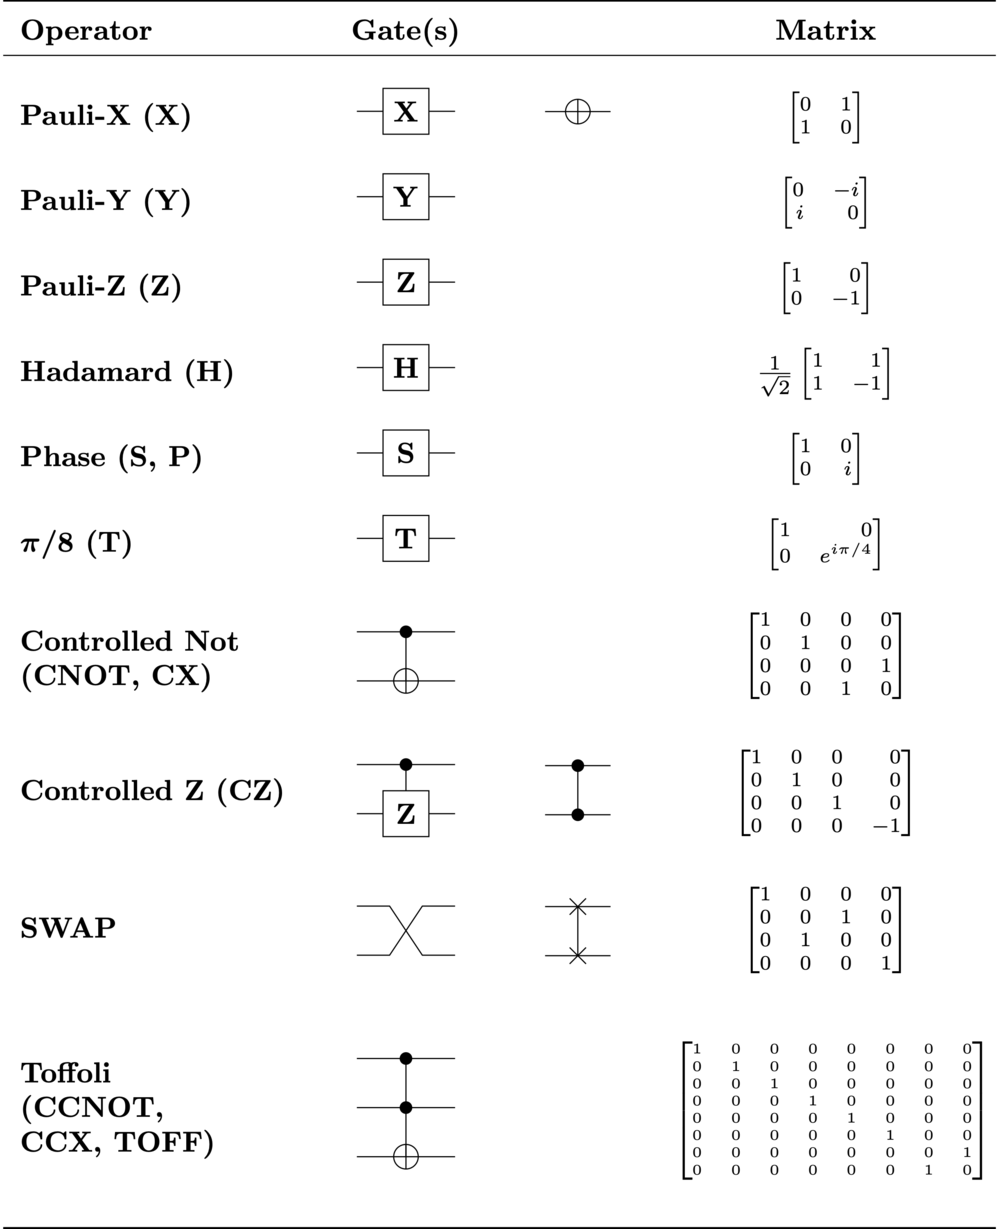

## Rotational gates acting on $j$-th qubit
### \begin{equation}
 \begin{split}
 R^x_j(\theta) = e^{-i\frac{\theta}{2} X_j} \\
 R^y_j(\theta) = e^{-i\frac{\theta}{2} Y_j} \\
 R^z_j(\theta) = e^{-i\frac{\theta}{2} Z_j} \\
 \end{split}
\end{equation}

In [ ]:
def Rx(theta, j):
    return expm(-1j*theta/2*X[j])

def Ry(theta, j):
    return expm(-1j*theta/2*Y[j])

def Rz(theta, j):
    return expm(-1j*theta/2*Z[j])

## Phase gate

### \begin{equation}
 P_j(\theta) = e^{i\frac{\theta}{2}}R^z_j(\theta)
\end{equation}

## Two-qubit gates

### CNOT

### \begin{equation}
 {\rm CNOT}_{i,j} = e^{i\frac{\pi}{4}(\mathbb{1} - Z[i])(\mathbb{1}-X[j])}
\end{equation}

In [ ]:
def CNOT(i,j):
    return  expm(pt.pi/4*(Id - X[i])@(Id - Z[j])*1j) 

In [ ]:
print(CNOT(2,1).real)

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]])


### Interaction gate

### \begin{equation}
 R^{XX}_{i,j}(\theta) = e^{-i\frac{\theta}{2}X_i\otimes X_j}
\end{equation}


In [ ]:
def RXX(i,j,theta):
    return expm(-theta/2*X[i]@X[j]*1j)

In [ ]:
print(RXX(1,2,pt.pi/2))

tensor([[1+0j, 0+0j, 0+0j, 0-1j],
        [0+0j, 1+0j, 0-1j, 0+0j],
        [0+0j, 0-1j, 1+0j, 0+0j],
        [0-1j, 0+0j, 0+0j, 1+0j]])


### SWAP gate

### \begin{equation}
{\rm SWAP}_{ij} = \frac{1}{2}(\mathbb{1}\otimes\mathbb{1} + X_i\otimes X_j + Y_i\otimes Y_j + Z_i\otimes Z_j)
\end{equation}

In [ ]:
def SWAP(i,j):
    return 0.5*(Id@Id + X[i]@X[j] + Y[i]@Y[j] + Z[i]@Z[j])

In [ ]:
print(SWAP(1,2).real)

tensor([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]])


## Three-qubits gate

### Toffoli gate

### \begin{equation}
 {\rm Toff}_{ijk} = e^{-i\frac{\pi}{8}(\mathbb{1} - Z_i)(\mathbb{1} - Z_j)(\mathbb{1} - X_k)}
\end{equation}

In [ ]:
def Toff(i,j,k):
    return expm(pt.pi/8*(Id - Z[i])@(Id - Z[j])@(Id - X[k])*1j)

In [ ]:
L = 3
Id, X, Y, Z = get_chain_operators(L)
print(Toff(1,2,3).real)

tensor([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0]])
